In [1]:
import xarray as xr
from src.regrid import regrid

In [2]:
!wget https://data.earthenv.org/topography/elevation_1KMmd_GMTEDmd.tif

--2020-12-23 14:14:27--  https://data.earthenv.org/topography/elevation_1KMmd_GMTEDmd.tif
Resolving data.earthenv.org (data.earthenv.org)... 172.67.196.246, 104.18.47.119, 104.18.46.119, ...
Connecting to data.earthenv.org (data.earthenv.org)|172.67.196.246|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 397232066 (379M) [image/tiff]
Saving to: ‘elevation_1KMmd_GMTEDmd.tif’

elevation_1KMmd_GMT 100%[===================>] 378.83M   164MB/s    in 2.3s    

2020-12-23 14:14:29 (164 MB/s) - ‘elevation_1KMmd_GMTEDmd.tif’ saved [397232066/397232066]



In [10]:
ds = xr.open_rasterio('elevation_1KMmd_GMTEDmd.tif')

In [11]:
ds = ds.isel(band=0).rename({'x': 'lon', 'y': 'lat'}).drop('band')

In [18]:
ds.lon

<xarray.DataArray 'lon' (lon: 43200)>
array([-179.995833, -179.9875  , -179.979167, ...,  179.979167,  179.9875  ,
        179.995833])
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0

In [20]:
ds = ds.assign_coords(lon=ds.lon.where(ds.lon > 0, 360 + ds.lon))

In [22]:
ds = ds.roll(lon=43200//2)

/home/stephan/.conda/envs/stephan/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


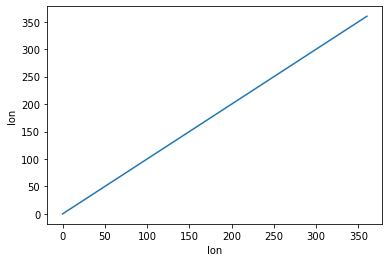

In [23]:
ds.lon.plot()

In [24]:
ds = ds.sel(lat=slice(50, 20), lon=slice(235, 290))

In [28]:
ds.max()

<xarray.DataArray ()>
array(4302.5, dtype=float32)